# SNEAKER WEBSITE SCRAPE

PURPOSE: The purpose of this program is aimed to conduct analytics of across various sneaker oriented websites

AUTHOR: dxjester

DATE UPDATED: 28-MAY-21

## PHASE 1: ENVIRONMENT SETUP

Import the necessary modules

In [1]:

import requests
import time as t
import pandas as pd
import datetime
import pprint
from datetime import date 

from bs4 import BeautifulSoup # to parse web page data
import glob # to read in files

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as po

# supervised learning modules
import statistics as stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# external python files
import plot_functions as pf
import text_functions as tf
# from collections import Counter
# from string import punctuation

Start time to calculate program duration

In [2]:
program_start = t.time()

Create a class in order to extract and create website objects

In [3]:
# 1.1 Class Declaration ------------------------------------------------------#
class sneaker_site:
    '''
    DESCRIPTION: Purpose of this class is to store website data located from various
        sneaker websites and retrieve pertinent key words from each object's scrape.
        The data scraped is then transformed into a tibble, which is then exported as 
        it's on individual CSV, later utilized for follow-on analytics
    '''
    
    # initialize the class
    def __init__ (self, name, url): # provide the name of the website and the url
        '''
        DESCRIPTION: initialize class with default class arguments
        '''
        self.website_name = name # set the name

        self.url = url # save the url
        self.site_text = '' # value to save the site text for each object
        self.converted_site_text = '' # converting the extracted value to lower case, via the 'text_functions' file
        self.lines = ''
        
        # create a dataframe to store extracted values for each object
        self.site_df = pd.DataFrame(columns = ['website','dtg', 'date','year', 'month', 'day', 'shoe_company', 'brand', 'count'])
        self.site_df['website'] = self.website_name # assign the website name to the entire class dataframe
        
        # creating Beautiful Soup variables to store individual values
        self.soup = '' # variable to store the complete values 
        self.hyperlink_list = '' # variable to store the hyperlinks tags
        self.paragraph_list = '' # variable to store paragraph value tags
        self.bold_list = '' # variable to store bold value tags
        
        # create the site variables to aggregate total counts for each object
        self.nike_site_count = 0
        self.adidas_site_count = 0
        self.reebok_site_count = 0
        self.new_balance_site_count = 0
        self.puma_site_count = 0
        self.vans_site_count = 0

        # default Nike list with different Nike shoe companies
        self.nike_master = ['nike', 'jordan', 'converse'] 
        # ['Nike', 'Air', 'Max', 'Jordan', 'Zoom', 'React', 'Shox', 'ACG', 'Max Plus', 'Joyride', 'Tinker', 'Force', 'Westbrook', 'Kyrie','Lebron', 'Durant', 'SB', 'Air Max 90', 'Air Max 97', 'Air Max 1', 'Kyrie', 'Air Max 270', 'Travis Scott' ]

        # default Adidas list with different Adidas shoe companies
        self.adidas_master = ['adidas', 'reebok', 'adidas', 'kanye', 'yeezy']
        # ['Adidas', 'ADIDAS', 'adidas', 'Yeezy', 'Kanye', 'Ultraboost', 'EQT', 'NMD', 'Ultra Boost', 'FYW', 'Harden']
        
        # default New Balance list 
        self.new_balance_master = ['NB', 'new balance']
        # ['New Balance', 'NB', 'Balance', '997', '801']
        
        # default Puma LIst
        self.puma_master = ['Puma', 'puma']
        #['Puma', 'Cell Venom', 'Thunder Spectre', 'Clyde Court']

        # default Vans list
        self.vans_master = ['Vans','vans']
        
        # concatenante the individual sneaker lists into one master list
        self.sneaker_list = self.nike_master + self.adidas_master + self.new_balance_master + self.puma_master + self.vans_master
        self.length = len(self.sneaker_list)         
        print("{} website object created".format(self.website_name))
    
    # class function to calculate the counts of each sneaker value in the master 'sneaker_list' data structure
    def site_calculate(self):
        '''
        DESCRIPTION: extract each website's raw data and append in the object's dataframe
        '''
        
        # to calculate the time needed to process the function from start to finish
        start_time = t.time() 
        print("\nRetrieving {} text and data ...".format(self.website_name))
        
        # establish connection to the website
        r = requests.get(self.url)
        self.soup = BeautifulSoup(r.content, "html.parser")
        
        # find and categorize all hyperlink (a), paragraph (p), and bold (b) html tags
        print("\nConsolidating all hyperlinks and paragraphs for", self.website_name)        
        self.hyperlink_list = self.soup.findAll('a')
        self.paragraph_list = self.soup.findAll('p')
        self.bold_list = self.soup.findAll('b')
        
        # convert individual Soup categories to text
        self.site_text = self.soup.get_text()
        self.converted_site_text = tf.normalize_string(self.site_text)
        print("\nConverting ", self.website_name, " to text file ... ")
        
        self.lines = [self.site_text.lower() for line in self.site_text]
        print("\nCalculating individual counts: " )
        
        index_num = 0

        # utilize the for loop to iterate over each object and count the .... 
        # ... amount of times a value is depicted in each extraction
        for brand in self.sneaker_list:
            
            # allocate object variables as values for the class dataframe
            website = self.website_name
            name = brand + ': '
            count = self.converted_site_text.count(brand) # count text items
            today = date.today()
            dtg = datetime.datetime.now()
            year = dtg.year
            month = dtg.month
            day_num = dtg.day

            shoe_company = ''
            
            # if count > 0 , aggregate the count based on shoe company name
            if count > 0:
                if brand in self.nike_master:
                    self.nike_site_count += count
                    shoe_company = 'Nike'
                elif brand in self.adidas_master:
                    self.adidas_site_count += count
                    shoe_company = 'Adidas'
                elif brand in self.new_balance_master:
                    self.new_balance_site_count += count
                    shoe_company = 'New Balance'
                elif brand in self.puma_master:
                    self.puma_site_count += count
                    shoe_company = 'Puma'
                elif brand in self.vans_master:
                    self.vans_site_count += count
                    shoe_company = 'Vans'
                else: 
                    0
            else: 
                if brand in self.nike_master:
                    shoe_company = 'Nike'
                elif brand in self.adidas_master:
                    shoe_company = 'Adidas'
                elif brand in self.new_balance_master:
                    shoe_company = 'New Balance'
                elif brand in self.puma_master:
                    shoe_company = 'Puma'
                elif brand in self.vans_master:
                    shoe_company = 'Vans'
                else: 
                    0      
                    
            # append each new row to the class dataframe
            self.site_df.loc[index_num] = [website, dtg, today, year, month, day_num, shoe_company, brand, count]        
            print(name, count)
            index_num += 1
        
        elapsed_time = t.time() - start_time 
        print("\n{} data ingest completed, total elapsed time: {} seconds\n".format(self.website_name, round(elapsed_time,2)))
        
    def display_info(self):
        '''
        DESCRIPTION: display object information
        '''
        print("\nCalculating total counts by shoe company...")
        print("Total Nike mentions: ", self.nike_site_count)
        print("Total Adidas mentions: ", self.adidas_site_count)
        print("Total New Balance mentions: ", self.new_balance_site_count)
        print("Total Puma mentions: ", self.puma_site_count)      
        print("Total Vans mentions: ", self.vans_site_count)      
        # print(self.site_df)      
        
    def return_df(self):
        '''
        DESCRIPTION: return class dataframe 
        '''
        return self.site_df

    def display_soup(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.soup)
    
    def display_links(self):
        '''
        DESCRIPTION: display hyperlinks for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.hyperlink_list)
    
    def display_paragraphs(self):
        '''
        DESCRIPTION: display paragraphs for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.paragraph_list)
        
    def display_bold(self):
        '''
        DESCRIPTION: display bold tags for the object
        '''
        pp = pprint.PrettyPrinter(indent=4)
        pp.pprint(self.bold_list)  

Create a cummulative sum detection function

In [4]:
def cusum(df, time_col, val_col, running_avg_count, confidence_interval):
    '''
    Purpose: A timeseries function aimed to conduct a change point detection analysis of timeseries data
    '''
    
    mod_df = df[[time_col, val_col]]
    mod_df['cusum'] = mod_df[val_col].cusum()
    return mod_df

## PHASE 2: DATA ETL

### Sneakernews.com Exploration

In [5]:
## 2.1: SNEAKERNEWS.com ingest and analysis -----------------------------------#

start_time = t.time() # calculate elapsed time

sneaker_news = sneaker_site('sneakernews.com', 'https://sneakernews.com/')
sneaker_news.site_calculate()
sneaker_news.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

sneakernews.com website object created

Retrieving sneakernews.com text and data ...

Consolidating all hyperlinks and paragraphs for sneakernews.com

Converting  sneakernews.com  to text file ... 

Calculating individual counts: 
nike:  8
jordan:  19
converse:  2
adidas:  10
reebok:  2
adidas:  10
kanye:  1
yeezy:  10
NB:  0
new balance:  4
Puma:  0
puma:  2
Vans:  0
vans:  2

sneakernews.com data ingest completed, total elapsed time: 1.05 seconds


Calculating total counts by shoe company...
Total Nike mentions:  29
Total Adidas mentions:  33
Total New Balance mentions:  4
Total Puma mentions:  2
Total Vans mentions:  2
 Total elapsed time in seconds:  1.05


Display the extracted site information

In [6]:
sneaker_news.display_soup()

<!DOCTYPE html>

<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" name="viewport"/>
<link href="http://gmpg.org/xfn/11" rel="profile"/>
<!--Consent partner code -->
<script data-blockingmode="auto" data-cbid="3ed3f229-9ee7-4bbb-9ca8-3d34eebf881f" data-framework="IAB" id="Cookiebot" src="https://consent.cookiebot.com/uc.js" type="text/javascript"></script>
<!--Consent partner code -->
<meta content="#FFFFFF" name="msapplication-TileColor"/>
<meta content="https://sneakernews.com/wp-content/themes/sneakernews/images/favicon-144.png" name="msapplication-TileImage"/>
<meta content="https://sneakernews.com/wp-content/themes/sneakernews/images/browserconfig.xml" name="msapplication-config"/>
<meta content="672125259652768" property="fb:app_id">
<!-- Admin Facebook Profile ID -->
<link href="https://sneakernews.com/wp-content/themes/sneakernews/images/favicon_icon.png" rel="shortcut icon" sizes="32x32" type="image/png"

Display the corresponding sneakernews.com links

In [7]:
sneaker_news.display_links()

[   <a class="skip-link" href="#main-content">Skip to main content</a>,
    <a href="https://sneakernews.com/">
<img alt="Site desktop logo" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/site-logo.png"/> </a>,
    <a class="white-logo" href="https://sneakernews.com/">
<img alt="Site menu open desktop logo" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/site-logo-white.png"/> </a>,
    <a href="https://sneakernews.com/">
<img alt="Sticky desktop logo" class="" src="https://sneakernews.com/wp-content/themes/sneakernews/images/sticky-menu-logo.png"/><img alt="Menu sticky white logo" class="white-logo" src="https://sneakernews.com/wp-content/themes/sneakernews/images/sticky-menu-logo-white.png"/> </a>,
    <a href="https://sneakernews.com/">News</a>,
    <a href="https://sneakernews.com/tag/where-to-buy/">Where To Buy</a>,
    <a href="/air-jordan-release-dates/">Jordan Release Dates</a>,
    <a href="https://sneakernews.com/adidas-y

Display sneakernews.com paragraphs

In [8]:
sneaker_news.display_paragraphs()

[   <p>
<a href="https://sneakernews.com/2022/01/19/louis-vuitton-nike-air-force-1-auction/">200 Pairs To Be Auctioned At Sothebys                            </a>
</p>,
    <p class="copyright">© 2007-2021 Sneaker News Inc<a class="powered-by-wpcom" href="https://wpvip.com/?utm_source=vip_powered_wpcom&amp;utm_medium=web&amp;utm_campaign=VIP%20Footer%20Credit&amp;utm_term=sneakernews.com" rel="generator nofollow"><img alt="Powered by WordPress VIP" height="26" src="https://sneakernews.com/wp-content/mu-plugins/vip-helpers/images/vip-powered-dark-small.png" width="187"/></a></p>]


In [9]:
sneaker_news.display_bold()

[]


Create a sneakernews.com dataframe from the extracted Beautiful Soup information

In [10]:
# retrieve master sneakernews.com dataframe
sneaker_news_df = sneaker_news.return_df()
sneaker_news_df.head(10)

website                        dtg        date  year month day  \
0  sneakernews.com 2022-01-22 15:02:17.304640  2022-01-22  2022     1  22   
1  sneakernews.com 2022-01-22 15:02:17.310917  2022-01-22  2022     1  22   
2  sneakernews.com 2022-01-22 15:02:17.316391  2022-01-22  2022     1  22   
3  sneakernews.com 2022-01-22 15:02:17.321181  2022-01-22  2022     1  22   
4  sneakernews.com 2022-01-22 15:02:17.325763  2022-01-22  2022     1  22   
5  sneakernews.com 2022-01-22 15:02:17.330095  2022-01-22  2022     1  22   
6  sneakernews.com 2022-01-22 15:02:17.334855  2022-01-22  2022     1  22   
7  sneakernews.com 2022-01-22 15:02:17.341283  2022-01-22  2022     1  22   
8  sneakernews.com 2022-01-22 15:02:17.347194  2022-01-22  2022     1  22   
9  sneakernews.com 2022-01-22 15:02:17.352155  2022-01-22  2022     1  22   

  shoe_company        brand count  
0         Nike         nike     8  
1         Nike       jordan    19  
2         Nike     converse     2  
3       Adidas       adidas    10  
4       Adidas       reebok     2  
5       Adidas       adidas    10  
6       Adidas        kanye     1  
7       Adidas        yeezy    10  
8  New Balance           NB     0  
9  New Balance  new balance     4

Plot total shoe company counts for sneakernews.com 

In [11]:
# website plotting
#pf.bar_chart(sneaker_news_df,'shoe_company', 'count', 'Sneakernews.com Count Summary')

sneaker_news_raw = sneaker_news_df[['shoe_company', 'count']]
sneaker_news_sum = sneaker_news_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(sneaker_news_df, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Display the percentage breakdown

In [12]:
# pie chart

fig = px.pie(sneaker_news_df, values='count', names='shoe_company')
fig.update_layout(
    title="sneakernews.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## Solecollector.com Exploration

Create the solecollector.com object

In [13]:
## 2.2: SOLECOLLECTOR.com ingest and analysis ---------------------------------#

start_time = t.time() # calculate elapsed time

sole_collector = sneaker_site('Solecollector.com', 'https://solecollector.com/')
sole_collector.site_calculate()
sole_collector.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

Solecollector.com website object created

Retrieving Solecollector.com text and data ...

Consolidating all hyperlinks and paragraphs for Solecollector.com

Converting  Solecollector.com  to text file ... 

Calculating individual counts: 
nike:  8
jordan:  2
converse:  0
adidas:  3
reebok:  1
adidas:  3
kanye:  0
yeezy:  2
NB:  0
new balance:  0
Puma:  0
puma:  1
Vans:  0
vans:  0

Solecollector.com data ingest completed, total elapsed time: 0.42 seconds


Calculating total counts by shoe company...
Total Nike mentions:  10
Total Adidas mentions:  9
Total New Balance mentions:  0
Total Puma mentions:  1
Total Vans mentions:  0
 Total elapsed time in seconds:  0.42


Display the exctracted site information

In [14]:
sole_collector.display_soup()

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Google Tag Manager -->
<script>window.Complex = window.Complex || {};window.Complex.dataLayer = window.Complex.dataLayer || [];(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl+ '&gtm_auth=guf9DFXeULaZuL1R99BIhA&gtm_preview=env-1&gtm_cookies_win=x';f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-5VPV4D');</script>
<!-- End Google Tag Manager -->
<script src="https://cdn.mylo.id/mylo-sdk-javascript/1.6.0/mylo.min.js"></script>
<!--START Lightbox Javascript-->
<script async="" src="https://www.lightboxcdn.com/vendor/c970ac6d-ceb6-4809-bf91-482b8308776d/lightbox_speed.js" type="text/javascript"></script>
<!--END Lightbox Javascript-->
<script type="text/javascript">
        var _sf_async_config = _s

Display the solecollector.com links

In [15]:
sole_collector.display_links()

[   <a href="/news/" target="_self">news</a>,
    <a href="/sneaker-release-dates/all-release-dates/" target="_self">release dates</a>,
    <a href="/sd/sole-search-sneaker-database/" target="_self">sole search</a>,
    <a href="/app/" target="_self">app</a>,
    <a ga-action="Click on main logo" ga-category="Main Header" ga-link="" href="/" target="_self">
<img alt="Sole Collector" src="https://images.solecollector.com/complex/image/upload/v1557174781/SC_Logo_TM_Blue_20190506-01_eeopog.svg"/>
</a>,
    <a ga-action="Click on social links" ga-label="Facebook" ga-link="" href="https://www.facebook.com/SoleCollectorMag" rel="nofollow" target="_blank">
<svg fill="#111111" height="20px" viewbox="0 0 200 200" width="20px" xmlns="http://www.w3.org/svg/2000"><path d="M115.4 65.5V48.3c0-2.6.1-4.6.4-6 .2-1.4.8-2.8 1.6-4.2.8-1.4 2.2-2.3 4.1-2.8 1.9-.5 4.4-.8 7.6-.8h17.2V0h-27.5c-15.9 0-27.4 3.8-34.3 11.3-7 7.6-10.5 18.8-10.5 33.5v20.8H53.4V100H74v100h41.4V100H143l3.6-34.5h-31.2z"></path></svg> <

Display solecollector.com paragraphs

In [16]:
sole_collector.display_paragraphs()

[   <p>SOLECOLLECTOR participates in various affiliate marketing programs, which means SOLECOLLECTOR gets paid commissions on purchases made through our links to retailer sites. Our editorial content is not influenced by any commissions we receive.</p>,
    <p>© 2022 Complex Media, Inc. All Rights Reserved.</p>]


In [17]:
sole_collector.display_bold()

[]


Create a solecollector.com dataframe for the extracted object

In [18]:
# retrieve master sneakernews.com dataframe
sole_collector_df = sole_collector.return_df()
sole_collector_df.head(10)

website                        dtg        date  year month day  \
0  Solecollector.com 2022-01-22 15:02:18.611364  2022-01-22  2022     1  22   
1  Solecollector.com 2022-01-22 15:02:18.616714  2022-01-22  2022     1  22   
2  Solecollector.com 2022-01-22 15:02:18.621027  2022-01-22  2022     1  22   
3  Solecollector.com 2022-01-22 15:02:18.625743  2022-01-22  2022     1  22   
4  Solecollector.com 2022-01-22 15:02:18.630281  2022-01-22  2022     1  22   
5  Solecollector.com 2022-01-22 15:02:18.635774  2022-01-22  2022     1  22   
6  Solecollector.com 2022-01-22 15:02:18.640794  2022-01-22  2022     1  22   
7  Solecollector.com 2022-01-22 15:02:18.648268  2022-01-22  2022     1  22   
8  Solecollector.com 2022-01-22 15:02:18.656287  2022-01-22  2022     1  22   
9  Solecollector.com 2022-01-22 15:02:18.662405  2022-01-22  2022     1  22   

  shoe_company        brand count  
0         Nike         nike     8  
1         Nike       jordan     2  
2         Nike     converse     0  
3       Adidas       adidas     3  
4       Adidas       reebok     1  
5       Adidas       adidas     3  
6       Adidas        kanye     0  
7       Adidas        yeezy     2  
8  New Balance           NB     0  
9  New Balance  new balance     0

Create a solecollector.com bar graph of shoe company mentions

In [19]:
# website plotting
#pf.bar_chart(sole_collector_df,'shoe_company', 'count', 'Solecollector.com')

sole_collector_raw = sole_collector_df[['shoe_company', 'count']]
sole_collector_final = sole_collector_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(sole_collector_final, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Display the percentage breakdown

In [20]:
# pf.pie_chart(sole_collector_df,'shoe_company', 'count', 'Solecollector.com')

fig = px.pie(sole_collector_df, values='count', names='shoe_company')
fig.update_layout(
    title="solecollector.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

## Hypebeast.com Exploration

Create the hypebeast.com object

In [21]:
# 2.3: HYPEBEAST.com ingest and analysis -------------------------------------#

start_time = t.time() # calculate start time

hypebeast = sneaker_site('hypebeast.com', 'https://hypebeast.com/')
hypebeast.site_calculate()
hypebeast.display_info()

elapsed_time = round(t.time() - start_time, 2)
print(" Total elapsed time in seconds: ", elapsed_time)

hypebeast.com website object created

Retrieving hypebeast.com text and data ...

Consolidating all hyperlinks and paragraphs for hypebeast.com

Converting  hypebeast.com  to text file ... 

Calculating individual counts: 
nike:  1
jordan:  0
converse:  0
adidas:  0
reebok:  2
adidas:  0
kanye:  2
yeezy:  0
NB:  0
new balance:  0
Puma:  0
puma:  0
Vans:  0
vans:  0

hypebeast.com data ingest completed, total elapsed time: 1.13 seconds


Calculating total counts by shoe company...
Total Nike mentions:  1
Total Adidas mentions:  4
Total New Balance mentions:  0
Total Puma mentions:  0
Total Vans mentions:  0
 Total elapsed time in seconds:  1.13


Display all extracted raw hypebeast.com information

In [22]:
hypebeast.display_soup()


<!DOCTYPE html>

<html>
<head>
<script type="text/javascript">
                var themeCookie = 'light';

                var cookieName = 'hb-theme';

                if (window.matchMedia('(prefers-color-scheme: dark)').matches) {
                    themeCookie = 'dark';
                } else if (window.matchMedia('(prefers-color-scheme: light)').matches) {
                    themeCookie = 'light';
                }

                var cookiearray = document.cookie.split(';');

                // Now take key value pair out of this array
                if (document.cookie) {
                    for (var i = 0; i < cookiearray.length; i++) {
                        var name = cookiearray[i].split('=')[0].trim();
                        var value = cookiearray[i].split('=')[1].trim();

                        if (name === cookieName) {
                            themeCookie = value;
                        }
                    }
                }
                function SetDa

Display the hypebeast.com links

In [23]:
hypebeast.display_links()

[   <a @click.prevent="toggleMobileMenu" href="#" id="mobile-menu-toggle"><span class="icon icon-navbar-hamburger"></span></a>,
    <a href="https://hypebeast.com/"><img alt="HYPEBEAST" class="img-fluid" src="https://static.hypebeast.com/dist/hypebeast/images/hypebeast-logo.4d6a6810.svg"/></a>,
    <a ga-event-action="clicks" ga-event-category="mobile navbar" ga-on="click" href="https://hbx.com/men/?utm_source=hypebeast.com/&amp;utm_medium=referral&amp;utm_campaign=mens-2021-6-9307-hypebeast_mobile_top_area_button_referral&amp;utm_content=image-placement-editorial-post" target="_blank">
                    Store</a>,
    <a href="https://hypebeast.com/latest" itemprop="url">Latest</a>,
    <a href="#" itemprop="url">Sections</a>,
    <a class="scale-effect" ga-event-action="clicks_category" ga-event-category="navigation bar" ga-event-label="https://hypebeast.com/fashion" ga-on="click" href="https://hypebeast.com/fashion"><img alt="Fashion" class="img-fluid" src="https://image-cdn.hypb.

Display hypebeast.com paragraphs

In [24]:
hypebeast.display_paragraphs()

[   <p>2022 Hypebeast Limited. All Rights Reserved.</p>,
    <p class="footer-links">
<span><a href="https://hypebeast.com/terms">Terms &amp; Conditions</a></span>
<span><a href="https://hypebeast.com/privacy">Privacy Policy</a></span>
</p>,
    <p>HYPEBEAST® is a registered trademark of Hypebeast Hong Kong Ltd.</p>,
    <p class="update"></p>,
    <p class="intro">Gain access to exclusive interviews with industry creatives, think pieces, trend forecasts, guides and more.</p>,
    <p class="content-p">
                        We charge advertisers instead of our readers. If you enjoy our content, please whitelist our site to show your support. We’d really appreciate it.
                    </p>,
    <p class="button-p whitelist-btn">
<a class="btn btn-link" ga-event-action="clicks_whitelist_us" ga-event-category="ad block message" ga-event-label="#" ga-on="click">
                            Whitelist Us
                        </a>
</p>,
    <p class="link-p">
<a ga-event-action="clic

In [25]:
hypebeast.display_bold()

[]


Create the hypebeast.com dataframe from the raw data set

In [26]:
# retrieve master hypebeast.com dataframe
hypebeast_df = hypebeast.return_df()
hypebeast_df.head(10)

website                        dtg        date  year month day  \
0  hypebeast.com 2022-01-22 15:02:19.987776  2022-01-22  2022     1  22   
1  hypebeast.com 2022-01-22 15:02:19.991504  2022-01-22  2022     1  22   
2  hypebeast.com 2022-01-22 15:02:19.995586  2022-01-22  2022     1  22   
3  hypebeast.com 2022-01-22 15:02:19.999626  2022-01-22  2022     1  22   
4  hypebeast.com 2022-01-22 15:02:20.003507  2022-01-22  2022     1  22   
5  hypebeast.com 2022-01-22 15:02:20.007158  2022-01-22  2022     1  22   
6  hypebeast.com 2022-01-22 15:02:20.011023  2022-01-22  2022     1  22   
7  hypebeast.com 2022-01-22 15:02:20.014933  2022-01-22  2022     1  22   
8  hypebeast.com 2022-01-22 15:02:20.019098  2022-01-22  2022     1  22   
9  hypebeast.com 2022-01-22 15:02:20.023016  2022-01-22  2022     1  22   

  shoe_company        brand count  
0         Nike         nike     1  
1         Nike       jordan     0  
2         Nike     converse     0  
3       Adidas       adidas     0  
4       Adidas       reebok     2  
5       Adidas       adidas     0  
6       Adidas        kanye     2  
7       Adidas        yeezy     0  
8  New Balance           NB     0  
9  New Balance  new balance     0

Plot the shoe company mentions for hypebeast.com

In [27]:
# website plotting
#pf.bar_chart(hypebeast_df,'shoe_company', 'count', 'Hypebeast.com')

hypebeast_raw = hypebeast_df[['shoe_company', 'count']]
hypebeast_final = hypebeast_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(hypebeast_final, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Display the percentage breakdown for hypebeast.com

In [28]:
#pf.pie_chart(hypebeast_df,'shoe_company', 'count', 'Hypebeast.com')


df = px.data.tips()
fig = px.pie(hypebeast_df, values='count', names='shoe_company')
fig.update_layout(
    title="Hypebeast.com Shoe Company Mentions ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()
print("\n End of Phase 2 ...\n")


 End of Phase 2 ...



## PHASE 3: MACRO LEVEL ANALYSIS

The purpose of this phase is to conduct a top level analysis of all cummulative data for the day executed.  The program concats three (3) x separate data frames into master dataframe, day_df.

In [29]:
sneaker_news_df

website                        dtg        date  year month day  \
0   sneakernews.com 2022-01-22 15:02:17.304640  2022-01-22  2022     1  22   
1   sneakernews.com 2022-01-22 15:02:17.310917  2022-01-22  2022     1  22   
2   sneakernews.com 2022-01-22 15:02:17.316391  2022-01-22  2022     1  22   
3   sneakernews.com 2022-01-22 15:02:17.321181  2022-01-22  2022     1  22   
4   sneakernews.com 2022-01-22 15:02:17.325763  2022-01-22  2022     1  22   
5   sneakernews.com 2022-01-22 15:02:17.330095  2022-01-22  2022     1  22   
6   sneakernews.com 2022-01-22 15:02:17.334855  2022-01-22  2022     1  22   
7   sneakernews.com 2022-01-22 15:02:17.341283  2022-01-22  2022     1  22   
8   sneakernews.com 2022-01-22 15:02:17.347194  2022-01-22  2022     1  22   
9   sneakernews.com 2022-01-22 15:02:17.352155  2022-01-22  2022     1  22   
10  sneakernews.com 2022-01-22 15:02:17.357013  2022-01-22  2022     1  22   
11  sneakernews.com 2022-01-22 15:02:17.361752  2022-01-22  2022     1  22   
12  sneakernews.com 2022-01-22 15:02:17.367304  2022-01-22  2022     1  22   
13  sneakernews.com 2022-01-22 15:02:17.373186  2022-01-22  2022     1  22   

   shoe_company        brand count  
0          Nike         nike     8  
1          Nike       jordan    19  
2          Nike     converse     2  
3        Adidas       adidas    10  
4        Adidas       reebok     2  
5        Adidas       adidas    10  
6        Adidas        kanye     1  
7        Adidas        yeezy    10  
8   New Balance           NB     0  
9   New Balance  new balance     4  
10         Puma         Puma     0  
11         Puma         puma     2  
12         Vans         Vans     0  
13         Vans         vans     2

Concat the three individual class objects (sneaker_news_df, sole_collector_df, hypebeast_df) as a master dataframe, day_master

In [30]:
print("\n Starting Phase 3 ...\n")

# concat the three dataframes into a single, unified dataframe
frames = [sneaker_news_df, sole_collector_df, hypebeast_df]
day_master = pd.concat(frames)
day_master['short_date'] = day_master['dtg'].dt.date

day_master


 Starting Phase 3 ...



website                        dtg        date  year month day  \
0     sneakernews.com 2022-01-22 15:02:17.304640  2022-01-22  2022     1  22   
1     sneakernews.com 2022-01-22 15:02:17.310917  2022-01-22  2022     1  22   
2     sneakernews.com 2022-01-22 15:02:17.316391  2022-01-22  2022     1  22   
3     sneakernews.com 2022-01-22 15:02:17.321181  2022-01-22  2022     1  22   
4     sneakernews.com 2022-01-22 15:02:17.325763  2022-01-22  2022     1  22   
5     sneakernews.com 2022-01-22 15:02:17.330095  2022-01-22  2022     1  22   
6     sneakernews.com 2022-01-22 15:02:17.334855  2022-01-22  2022     1  22   
7     sneakernews.com 2022-01-22 15:02:17.341283  2022-01-22  2022     1  22   
8     sneakernews.com 2022-01-22 15:02:17.347194  2022-01-22  2022     1  22   
9     sneakernews.com 2022-01-22 15:02:17.352155  2022-01-22  2022     1  22   
10    sneakernews.com 2022-01-22 15:02:17.357013  2022-01-22  2022     1  22   
11    sneakernews.com 2022-01-22 15:02:17.361752  2022-01-22  2022     1  22   
12    sneakernews.com 2022-01-22 15:02:17.367304  2022-01-22  2022     1  22   
13    sneakernews.com 2022-01-22 15:02:17.373186  2022-01-22  2022     1  22   
0   Solecollector.com 2022-01-22 15:02:18.611364  2022-01-22  2022     1  22   
1   Solecollector.com 2022-01-22 15:02:18.616714  2022-01-22  2022     1  22   
2   Solecollector.com 2022-01-22 15:02:18.621027  2022-01-22  2022     1  22   
3   Solecollector.com 2022-01-22 15:02:18.625743  2022-01-22  2022     1  22   
4   Solecollector.com 2022-01-22 15:02:18.630281  2022-01-22  2022     1  22   
5   Solecollector.com 2022-01-22 15:02:18.635774  2022-01-22  2022     1  22   
6   Solecollector.com 2022-01-22 15:02:18.640794  2022-01-22  2022     1  22   
7   Solecollector.com 2022-01-22 15:02:18.648268  2022-01-22  2022     1  22   
8   Solecollector.com 2022-01-22 15:02:18.656287  2022-01-22  2022     1  22   
9   Solecollector.com 2022-01-22 15:02:18.662405  2022-01-22  2022     1  22   
10  Solecollector.com 2022-01-22 15:02:18.668150  2022-01-22  2022     1  22   
11  Solecollector.com 2022-01-22 15:02:18.673618  2022-01-22  2022     1  22   
12  Solecollector.com 2022-01-22 15:02:18.680452  2022-01-22  2022     1  22   
13  Solecollector.com 2022-01-22 15:02:18.686509  2022-01-22  2022     1  22   
0       hypebeast.com 2022-01-22 15:02:19.987776  2022-01-22  2022     1  22   
1       hypebeast.com 2022-01-22 15:02:19.991504  2022-01-22  2022     1  22   
2       hypebeast.com 2022-01-22 15:02:19.995586  2022-01-22  2022     1  22   
3       hypebeast.com 2022-01-22 15:02:19.999626  2022-01-22  2022     1  22   
4       hypebeast.com 2022-01-22 15:02:20.003507  2022-01-22  2022     1  22   
5       hypebeast.com 2022-01-22 15:02:20.007158  2022-01-22  2022     1  22   
6       hypebeast.com 2022-01-22 15:02:20.011023  2022-01-22  2022     1  22   
7       hypebeast.com 2022-01-22 15:02:20.014933  2022-01-22  2022     1  22   
8       hypebeast.com 2022-01-22 15:02:20.019098  2022-01-22  2022     1  22   
9       hypebeast.com 2022-01-22 15:02:20.023016  2022-01-22  2022     1  22   
10      hypebeast.com 2022-01-22 15:02:20.027667  2022-01-22  2022     1  22   
11      hypebeast.com 2022-01-22 15:02:20.031791  2022-01-22  2022     1  22   
12      hypebeast.com 2022-01-22 15:02:20.037311  2022-01-22  2022     1  22   
13      hypebeast.com 2022-01-22 15:02:20.041805  2022-01-22  2022     1  22   

   shoe_company        brand count  short_date  
0          Nike         nike     8  2022-01-22  
1          Nike       jordan    19  2022-01-22  
2          Nike     converse     2  2022-01-22  
3        Adidas       adidas    10  2022-01-22  
4        Adidas       reebok     2  2022-01-22  
5        Adidas       adidas    10  2022-01-22  
6        Adidas        kanye     1  2022-01-22  
7        Adidas        yeezy    10  2022-01-22  
8   New Balance           NB     0  2022-01-22  
9   New Balance  new balance     4  2022-01-22  
10         Puma         Puma     0

Plot the consolidated shoe company mention count for all three sites

In [31]:
#pf.bar_chart(day_master,'shoe_company', 'count', 'Consolidated Bar Chart Report')

day_raw = day_master[['shoe_company', 'count']]
day_df = day_raw.groupby(['shoe_company']).sum().reset_index()

fig = px.bar(day_df, x='shoe_company', y='count', color = 'shoe_company')
fig.show()

Plot the percentage breakdown for the day

In [32]:
#pf.pie_chart(day_master,'shoe_company', 'count', 'Consolidated Pie Report')

df = px.data.tips()
fig = px.pie(day_master, values='count', names='shoe_company')
fig.update_layout(
    title="Shoe Company Mentions (Cummulative) ",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

Export the daily file to the root storage folder

In [33]:
path = '/Users/patrickbenitez/Desktop/GT/Codebook/Git/Py.sneakernews.webscrape/df_exports/'
# Converting date into DD-MM-YYYY format
temp_date = datetime.datetime.today()

file_date = temp_date.strftime('%Y-%m-%d')

In [34]:
# create the full file path
full_path = path + "v3_" +  file_date + ".csv"

# export the file to the /df_exports/ directory
day_master.to_csv(full_path)

print("\nFile successfully exported!")


File successfully exported!


Summarize daily counts

In [35]:
day_master

website                        dtg        date  year month day  \
0     sneakernews.com 2022-01-22 15:02:17.304640  2022-01-22  2022     1  22   
1     sneakernews.com 2022-01-22 15:02:17.310917  2022-01-22  2022     1  22   
2     sneakernews.com 2022-01-22 15:02:17.316391  2022-01-22  2022     1  22   
3     sneakernews.com 2022-01-22 15:02:17.321181  2022-01-22  2022     1  22   
4     sneakernews.com 2022-01-22 15:02:17.325763  2022-01-22  2022     1  22   
5     sneakernews.com 2022-01-22 15:02:17.330095  2022-01-22  2022     1  22   
6     sneakernews.com 2022-01-22 15:02:17.334855  2022-01-22  2022     1  22   
7     sneakernews.com 2022-01-22 15:02:17.341283  2022-01-22  2022     1  22   
8     sneakernews.com 2022-01-22 15:02:17.347194  2022-01-22  2022     1  22   
9     sneakernews.com 2022-01-22 15:02:17.352155  2022-01-22  2022     1  22   
10    sneakernews.com 2022-01-22 15:02:17.357013  2022-01-22  2022     1  22   
11    sneakernews.com 2022-01-22 15:02:17.361752  2022-01-22  2022     1  22   
12    sneakernews.com 2022-01-22 15:02:17.367304  2022-01-22  2022     1  22   
13    sneakernews.com 2022-01-22 15:02:17.373186  2022-01-22  2022     1  22   
0   Solecollector.com 2022-01-22 15:02:18.611364  2022-01-22  2022     1  22   
1   Solecollector.com 2022-01-22 15:02:18.616714  2022-01-22  2022     1  22   
2   Solecollector.com 2022-01-22 15:02:18.621027  2022-01-22  2022     1  22   
3   Solecollector.com 2022-01-22 15:02:18.625743  2022-01-22  2022     1  22   
4   Solecollector.com 2022-01-22 15:02:18.630281  2022-01-22  2022     1  22   
5   Solecollector.com 2022-01-22 15:02:18.635774  2022-01-22  2022     1  22   
6   Solecollector.com 2022-01-22 15:02:18.640794  2022-01-22  2022     1  22   
7   Solecollector.com 2022-01-22 15:02:18.648268  2022-01-22  2022     1  22   
8   Solecollector.com 2022-01-22 15:02:18.656287  2022-01-22  2022     1  22   
9   Solecollector.com 2022-01-22 15:02:18.662405  2022-01-22  2022     1  22   
10  Solecollector.com 2022-01-22 15:02:18.668150  2022-01-22  2022     1  22   
11  Solecollector.com 2022-01-22 15:02:18.673618  2022-01-22  2022     1  22   
12  Solecollector.com 2022-01-22 15:02:18.680452  2022-01-22  2022     1  22   
13  Solecollector.com 2022-01-22 15:02:18.686509  2022-01-22  2022     1  22   
0       hypebeast.com 2022-01-22 15:02:19.987776  2022-01-22  2022     1  22   
1       hypebeast.com 2022-01-22 15:02:19.991504  2022-01-22  2022     1  22   
2       hypebeast.com 2022-01-22 15:02:19.995586  2022-01-22  2022     1  22   
3       hypebeast.com 2022-01-22 15:02:19.999626  2022-01-22  2022     1  22   
4       hypebeast.com 2022-01-22 15:02:20.003507  2022-01-22  2022     1  22   
5       hypebeast.com 2022-01-22 15:02:20.007158  2022-01-22  2022     1  22   
6       hypebeast.com 2022-01-22 15:02:20.011023  2022-01-22  2022     1  22   
7       hypebeast.com 2022-01-22 15:02:20.014933  2022-01-22  2022     1  22   
8       hypebeast.com 2022-01-22 15:02:20.019098  2022-01-22  2022     1  22   
9       hypebeast.com 2022-01-22 15:02:20.023016  2022-01-22  2022     1  22   
10      hypebeast.com 2022-01-22 15:02:20.027667  2022-01-22  2022     1  22   
11      hypebeast.com 2022-01-22 15:02:20.031791  2022-01-22  2022     1  22   
12      hypebeast.com 2022-01-22 15:02:20.037311  2022-01-22  2022     1  22   
13      hypebeast.com 2022-01-22 15:02:20.041805  2022-01-22  2022     1  22   

   shoe_company        brand count  short_date  
0          Nike         nike     8  2022-01-22  
1          Nike       jordan    19  2022-01-22  
2          Nike     converse     2  2022-01-22  
3        Adidas       adidas    10  2022-01-22  
4        Adidas       reebok     2  2022-01-22  
5        Adidas       adidas    10  2022-01-22  
6        Adidas        kanye     1  2022-01-22  
7        Adidas        yeezy    10  2022-01-22  
8   New Balance           NB     0  2022-01-22  
9   New Balance  new balance     4  2022-01-22  
10         Puma         Puma     0

## PHASE 4: CSV IMPORT AND EXPLORATION

The purpose of this phase is to conduct historical level analysis of all cummulative data extracted since project inception.  The program invokes the 'glob' module in order to import all standalone csv files from previous daily extracts.

Due to continuous improvements in the master branch, historical data is formatted in three (3) x separate versions. The glob function imports these three (3) x separate versions for all stored files and conditions the data in order to conduct unified analysis on one master dataframe

In [36]:
## 4.1: Determine all version 1.0 files located in the 'df_exports' directory--#
import glob # to read in multiple csv files


print("\nRetrieving version 1.0 csv files ...")

csv_list = [] # store values in the list



Retrieving version 1.0 csv files ...


In [37]:
# import version 1.0 files
for csv_file_v1 in glob.glob('df_exports/v1_*.csv'): # only retrieve "v1_" csv files
    csv_list.append(csv_file_v1)
    print (csv_file_v1)
    
print("\nTotal amount of v1.0 files: {}".format(len(csv_list)))

df_exports/v1_2019-11-18.csv
df_exports/v1_2019-11-24.csv
df_exports/v1_2019-11-30.csv
df_exports/v1_2019-11-25.csv
df_exports/v1_2019-11-19.csv
df_exports/v1_2019-11-27.csv
df_exports/v1_2019-11-26.csv
df_exports/v1_2019-11-22.csv
df_exports/v1_2019-11-23.csv
df_exports/v1_2019-11-21.csv
df_exports/v1_2019-11-20.csv
df_exports/v1_2019-12-02.csv
df_exports/v1_2019-12-03.csv
df_exports/v1_2019-12-01.csv
df_exports/v1_2019-12-14.csv
df_exports/v1_2019-12-10.csv
df_exports/v1_2019-12-11.csv
df_exports/v1_2019-12-05.csv
df_exports/v1_2019-12-07.csv
df_exports/v1_2019-12-06.csv
df_exports/v1_2019-12-12.csv
df_exports/v1_2019-12-20.csv
df_exports/v1_2019-12-08.csv
df_exports/v1_2019-12-09.csv
df_exports/v1_2019-12-19.csv
df_exports/v1_2019-11-17.csv
df_exports/v1_2019-11-16.csv
df_exports/v1_2019-11-28.csv
df_exports/v1_2019-11-29.csv

Total amount of v1.0 files: 29


In [38]:
# import version 2.0 files
for csv_file_v2 in glob.glob('df_exports/v2_*.csv'): # only retrieve "v2_" csv files
    csv_list.append(csv_file_v2)
    print (csv_file_v2)

print("\nTotal amount of v2.0 files: {}".format(len(csv_list)))

df_exports/v2_2020-01-23.csv
df_exports/v2_2019-12-28.csv
df_exports/v2_2020-01-09.csv
df_exports/v2_2020-01-21.csv
df_exports/v2_2020-03-18.csv
df_exports/v2_2020-01-20.csv
df_exports/v2_2020-01-08.csv
df_exports/v2_2019-12-29.csv
df_exports/v2_2020-01-24.csv
df_exports/v2_2020-01-18.csv
df_exports/v2_2020-03-21.csv
df_exports/v2_2020-03-09.csv
df_exports/v2_2020-03-20.csv
df_exports/v2_2020-01-25.csv
df_exports/v2_2020-01-27.csv
df_exports/v2_2020-01-26.csv
df_exports/v2_2020-02-17.csv
df_exports/v2_2020-02-29.csv
df_exports/v2_2020-02-15.csv
df_exports/v2_2020-02-14.csv
df_exports/v2_2020-02-18.csv
df_exports/v2_2020-02-27.csv
df_exports/v2_2020-02-21.csv
df_exports/v2_2019-12-22.csv
df_exports/v2_2020-01-03.csv
df_exports/v2_2020-01-17.csv
df_exports/v2_2020-03-06.csv
df_exports/v2_2020-03-12.csv
df_exports/v2_2020-03-13.csv
df_exports/v2_2020-03-07.csv
df_exports/v2_2020-01-02.csv
df_exports/v2_2019-12-23.csv
df_exports/v2_2019-12-21.csv
df_exports/v2_2020-01-28.csv
df_exports/v2_

Create a dataframe of version 1.0 and 2.0 files in order to change 'category_name' and 'item' column headers to 'shoe_company' and 'brand'

In [39]:
# 4.2: Read in each csv file into the master dataframe -----------------------#
# 4.2.1: read in the local files and aggregate as a single dataframe -#
old_df = pd.DataFrame(columns=['date', 'category_name', 'item', 'count'])

# extract the four columns from each csv file and append to 'master_df'
for csv_file in csv_list:
    temp_df = pd.read_csv(csv_file)
    sliced_df = temp_df[['date', 'category_name', 'item', 'count']]
    old_df = pd.concat([old_df, sliced_df])
    
old_df['count'] = old_df['count'].astype(int)
old_df['date'] = old_df['date'].astype('datetime64[ns]')
old_df.rename(columns = {'category_name':'shoe_company', 'item':'brand'}, inplace = True) 
old_df.head(25)

date shoe_company        brand  count
0  2019-11-18         Nike         Nike      9
1  2019-11-18         Nike       Jordan     20
2  2019-11-18         Nike     Converse      2
3  2019-11-18       Adidas       Adidas      0
4  2019-11-18       Adidas       Reebok      2
5  2019-11-18       Adidas       ADIDAS      0
6  2019-11-18       Adidas        Yeezy      8
7  2019-11-18       Adidas        Kanye      0
8  2019-11-18       Adidas       adidas     10
9  2019-11-18       Adidas        kanye      0
10 2019-11-18       Adidas        yeezy      0
11 2019-11-18  New Balance  New Balance      2
12 2019-11-18  New Balance           NB      0
13 2019-11-18  New Balance  new balance      0
14 2019-11-18         Puma         Puma      2
15 2019-11-18         Puma         puma      0
16 2019-11-18         Vans         Vans      2
17 2019-11-18         Vans         vans      0
18 2019-11-18         Nike         Nike      8
19 2019-11-18         Nike       Jordan      3
20 2019-11-18         Nike     Converse      0
21 2019-11-18       Adidas       Adidas      1
22 2019-11-18       Adidas       Reebok      3
23 2019-11-18       Adidas       ADIDAS      0
24 2019-11-18       Adidas        Yeezy      0

In [40]:
# import version 3.0 files

csv_list2 = [] # list to store csv version 3 files
for csv_file_v3 in glob.glob('df_exports/v3_*.csv'): # only retrieve "v2_" csv files
    csv_list2.append(csv_file_v3)
    print (csv_file_v3)

print("\nTotal amount of files: {}".format(len(csv_list2)))

df_exports/v3_2021-12-11.csv
df_exports/v3_2021-12-05.csv
df_exports/v3_2021-05-09.csv
df_exports/v3_2020-03-23.csv
df_exports/v3_2020-04-02.csv
df_exports/v3_2021-05-21.csv
df_exports/v3_2020-04-16.csv
df_exports/v3_2020-08-16.csv
df_exports/v3_2021-07-18.csv
df_exports/v3_2020-08-02.csv
df_exports/v3_2020-06-07.csv
df_exports/v3_2021-07-24.csv
df_exports/v3_2020-06-13.csv
df_exports/v3_2020-11-23.csv
df_exports/v3_2021-10-01.csv
df_exports/v3_2020-11-22.csv
df_exports/v3_2020-06-12.csv
df_exports/v3_2020-06-06.csv
df_exports/v3_2020-08-03.csv
df_exports/v3_2021-07-19.csv
df_exports/v3_2020-08-17.csv
df_exports/v3_2020-04-17.csv
df_exports/v3_2020-04-03.csv
df_exports/v3_2020-03-22.csv
df_exports/v3_2021-02-01.csv
df_exports/v3_2021-12-04.csv
df_exports/v3_2021-12-12.csv
df_exports/v3_2020-04-29.csv
df_exports/v3_2020-04-15.csv
df_exports/v3_2020-04-01.csv
df_exports/v3_2020-08-01.csv
df_exports/v3_2020-08-15.csv
df_exports/v3_2021-07-27.csv
df_exports/v3_2020-06-10.csv
df_exports/v3_

In [41]:
# 4.2: Read in each csv file into the master dataframe -----------------------#
# 4.2.1: read in the local files and aggregate as a single dataframe -#
master_df = pd.DataFrame(columns=['date', 'shoe_company', 'brand', 'count'])

# extract the four columns from each csv file and append to 'master_df'
for csv_file in csv_list2:
    temp_df = pd.read_csv(csv_file)
    sliced_df = temp_df[['date', 'shoe_company', 'brand', 'count']]
    master_df = pd.concat([master_df, sliced_df])
    
master_df['count'] = master_df['count'].astype(int)
master_df['date'] = master_df['date'].astype('datetime64[ns]')
master_df.dtypes
master_df.head(10)

date shoe_company        brand  count
0 2021-12-11         Nike         nike     11
1 2021-12-11         Nike       jordan     20
2 2021-12-11         Nike     converse      2
3 2021-12-11       Adidas       adidas      7
4 2021-12-11       Adidas       reebok      2
5 2021-12-11       Adidas       adidas      7
6 2021-12-11       Adidas        kanye      0
7 2021-12-11       Adidas        yeezy      7
8 2021-12-11  New Balance           NB      0
9 2021-12-11  New Balance  new balance      4

In [42]:
final_df = old_df.append(master_df)
final_df.tail(10)

date shoe_company        brand  count
32 2021-05-10       Adidas       reebok      0
33 2021-05-10       Adidas       adidas      0
34 2021-05-10       Adidas        kanye      1
35 2021-05-10       Adidas        yeezy      0
36 2021-05-10  New Balance           NB      0
37 2021-05-10  New Balance  new balance      0
38 2021-05-10         Puma         Puma      0
39 2021-05-10         Puma         puma      0
40 2021-05-10         Vans         Vans      0
41 2021-05-10         Vans         vans      0

Display the histogram count

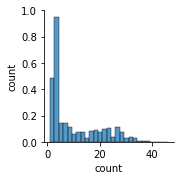

In [43]:
# group by sum the master_df dataframe for follow-on analysis
master_sum_df = final_df.groupby(['date','shoe_company', 'brand']).sum().reset_index()
summarized_df = master_sum_df[master_sum_df['count'] != 0]
summarized_df.head(5)

sns.pairplot(summarized_df)

In [44]:
master_sum_df

date shoe_company   brand  count
0    2019-11-16       Adidas  ADIDAS      0
1    2019-11-16       Adidas  Adidas      5
2    2019-11-16       Adidas   Kanye      2
3    2019-11-16       Adidas  Reebok      3
4    2019-11-16       Adidas   Yeezy      8
...         ...          ...     ...    ...
6307 2022-01-22         Nike    nike     17
6308 2022-01-22         Puma    Puma      0
6309 2022-01-22         Puma    puma      3
6310 2022-01-22         Vans    Vans      0
6311 2022-01-22         Vans    vans      2

[6312 rows x 4 columns]

Drop the 'brand' column from the master_sum_df and name new df as 'category_df'

In [45]:
# 4.2.2: Unstack and pairplot the master dataframe for category_name df - #
category_df = master_sum_df[['date','shoe_company','count']]
category_df = category_df.groupby(['date','shoe_company']).sum().reset_index()
category_df.head(10)

date shoe_company  count
0 2019-11-16       Adidas     26
1 2019-11-16  New Balance      3
2 2019-11-16         Nike     57
3 2019-11-16         Puma      4
4 2019-11-16         Vans      2
5 2019-11-17       Adidas     25
6 2019-11-17  New Balance      3
7 2019-11-17         Nike     52
8 2019-11-17         Puma      4
9 2019-11-17         Vans      4

Unstack the 'shoe_company' values as stand alone columns in order to conduct multivariate analysis

In [46]:
unstack_category_df = category_df.pivot_table(index = ['date'], 
                                   columns = 'shoe_company',
                                   values = 'count',
                                   aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_category_df.tail(10)

date  Adidas  New Balance  Nike  Puma  Vans
461 2022-01-08      39            6    40     3     2
462 2022-01-09      43            6    41     3     2
463 2022-01-10      38            7    43     3     2
464 2022-01-11      35            5    45     3     2
465 2022-01-13      40            5    41     3     2
466 2022-01-14      47            4    35     3     3
467 2022-01-16      44            4    41     3     4
468 2022-01-18      40            4    38     5     2
469 2022-01-21      43            4    45     3     2
470 2022-01-22      46            4    40     3     2

Pairplot the 'unstack_category_df' dataframe

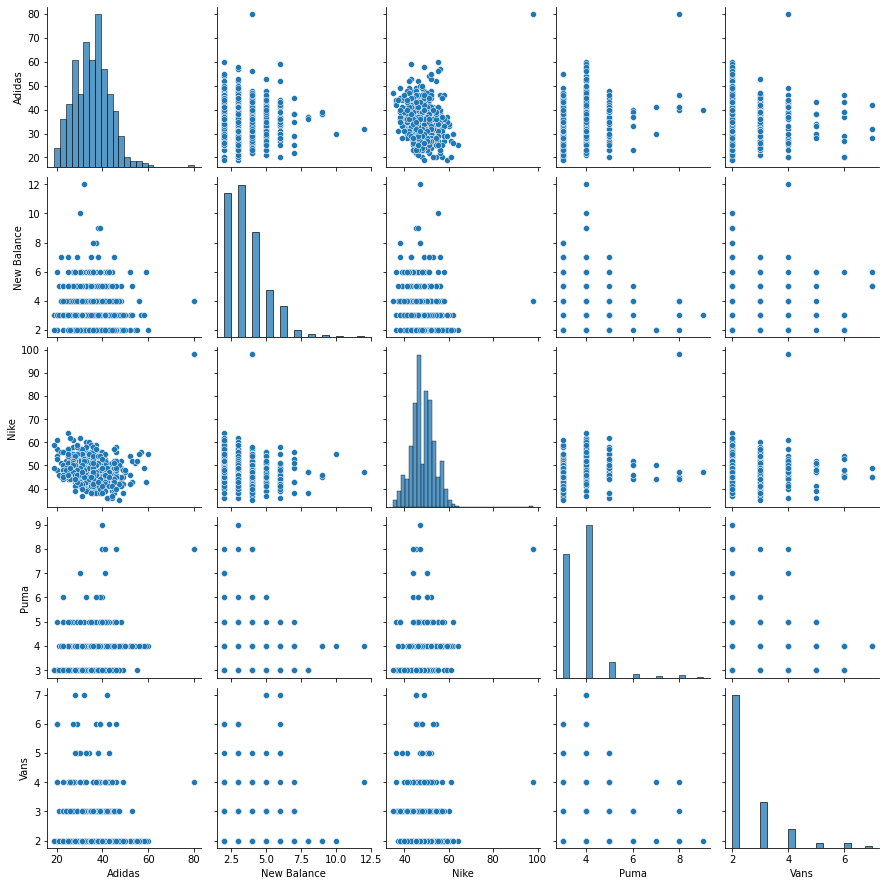

In [47]:
sns.pairplot(unstack_category_df) # pairplot the category dataframe

Create a new dataframe with 'brand' and 'date' values

In [48]:
item_temp_df = master_df[['date','brand','count']]
item2_df = item_temp_df.groupby(['date', 'brand']).sum().reset_index()

Remove rows where the count is equal to 0

In [49]:
# remove rows where count is equal to '0'
item_df = item2_df[item2_df['count'] != 0]
item_df.head(20)

date        brand  count
3  2020-03-22       adidas     28
4  2020-03-22     converse      3
5  2020-03-22       jordan     26
7  2020-03-22  new balance      4
8  2020-03-22         nike     19
9  2020-03-22         puma      4
10 2020-03-22       reebok      3
11 2020-03-22         vans      2
12 2020-03-22        yeezy      7
16 2020-03-23       adidas     28
17 2020-03-23     converse      5
18 2020-03-23       jordan     25
20 2020-03-23  new balance      5
21 2020-03-23         nike     16
22 2020-03-23         puma      4
23 2020-03-23       reebok      3
24 2020-03-23         vans      2
25 2020-03-23        yeezy      9
29 2020-03-24       adidas     26
30 2020-03-24     converse      7

Unstack the 'item_df' dataframe in order to conduct follow-on multivariate regression analysis

In [50]:
unstack_item_df = item_df.pivot_table(index = ['date'],
                                      columns = 'brand',
                                      values = 'count',
                                      aggfunc='first').reset_index().rename_axis(None, axis=1)

unstack_item_df.tail(50)

date  adidas  converse  jordan  kanye  new balance  nike  puma  \
333 2021-08-22    16.0       2.0    31.0    2.0          4.0  13.0   3.0   
334 2021-08-28    20.0       2.0    23.0    2.0          5.0  18.0   3.0   
335 2021-08-29    10.0       2.0    20.0    5.0          3.0  27.0   3.0   
336 2021-09-02    14.0       2.0    27.0    2.0          3.0  17.0   3.0   
337 2021-09-06    20.0       2.0    19.0    NaN          8.0  17.0   3.0   
338 2021-09-07    20.0       3.0    25.0    2.0          6.0  16.0   3.0   
339 2021-09-10    20.0       2.0    33.0    NaN          8.0  12.0   3.0   
340 2021-09-18    18.0       2.0    25.0    NaN          3.0  17.0   3.0   
341 2021-09-24    28.0       2.0    26.0    NaN          4.0  10.0   3.0   
342 2021-09-26    18.0       2.0    23.0    NaN          3.0  17.0   3.0   
343 2021-10-01    20.0       2.0    25.0    NaN          6.0  15.0   3.0   
344 2021-10-02    26.0       3.0    26.0    NaN          3.0  15.0   3.0   
345 2021-10-10    18.0       2.0    25.0    NaN          4.0  13.0   3.0   
346 2021-10-11    16.0       2.0    21.0    2.0          4.0  16.0   3.0   
347 2021-10-12    16.0       2.0    22.0    NaN          4.0  13.0   4.0   
348 2021-11-11    16.0       2.0    32.0    NaN          4.0  12.0   4.0   
349 2021-11-12    16.0       3.0    33.0    NaN          3.0   9.0   3.0   
350 2021-11-14    16.0       2.0    29.0    1.0          3.0  15.0   3.0   
351 2021-11-15    20.0       2.0    29.0    NaN          3.0  12.0   3.0   
352 2021-11-18    20.0       2.0    25.0    1.0          4.0  18.0   3.0   
353 2021-11-21    22.0       2.0    23.0    NaN          3.0  15.0   3.0   
354 2021-11-26    24.0       3.0    19.0    1.0          3.0  16.0   3.0   
355 2021-11-28    22.0       2.0    21.0    NaN          7.0  15.0   5.0   
356 2021-11-29    16.0       3.0    22.0    1.0          6.0  14.0   3.0   
357 2021-12-04    30.0       2.0    25.0    NaN          5.0  10.0   3.0   
358 2021-12-05    20.0       2.0    27.0    NaN          3.0  12.0   3.0   
359 2021-12-07    28.0       2.0    29.0    1.0          7.0  12.0   3.0   
360 2021-12-11    24.0       2.0    25.0    4.0          4.0  15.0   3.0   
361 2021-12-12    26.0       2.0    24.0    2.0          4.0  13.0   3.0   
362 2021-12-13    32.0       2.0    22.0    NaN          3.0  14.0   3.0   
363 2021-12-19    28.0       2.0    22.0    NaN          3.0  16.0   3.0   
364 2021-12-21    26.0       3.0    26.0    1.0          3.0  17.0   3.0   
365 2021-12-23    24.0       2.0    28.0    NaN          3.0  11.0   3.0   
366 2021-12-24    20.0       2.0    35.0    NaN          4.0  10.0   3.0   
367 2021-12-25    16.0       2.0    31.0    NaN          3.0  11.0   3.0   
368 2021-12-29    28.0       2.0    29.0    NaN          3.0  12.0   3.0   
369 2022-01-01    24.0       2.0    25.0    NaN          4.0  14.0   3.0   
370 2022-01-04    24.0       2.0    27.0    NaN          4.0  12.0   3.0   
371 2022-01-05    30.0       2.0    23.0    NaN          5.0  17.0   3.0   
372 2022-01-07    24.0       5.0    26.0    NaN          6.0  11.0   4.0   
373 2022-01-08    22.0       3.0    25.0    NaN          6.0  12.0   3.0   
374 2022-01-09    28.0       3.0    24.0    NaN          6.0  14.0   3.0   
375 2022-01-10    24.0       2.0    25.0    NaN          7.0  16.0   3.0   
376 2022-01-11    22.0       2.0    23.0    NaN          5.0  20.0   3.0   
377 2022-01-13    28.0       2.0    24.0    NaN          5.0  15.0   3.0   
378 2022-01-14    34.0       2.0    23.0    NaN          4.0  10.0   3.0   
379 2022-01-16    26.0       3.0    25.0    1.0          4.0  13.0   3.0   
380 2022-01-18    22.0       2.0    20.0    NaN          4.0  16.0   5.0   
381 2022-01-21    22.0       2.0    26.0    3.0          4.0  17.0   3.0   
382 2022-01-22    26.0       2.0    21.0    3.0          4.0  17.0   3.0   

     reebok  vans  yeezy  
333     3.0   2.0    8.0  
334     3.0   2.0   14.0  
335     3.0   2.0    8.0  
336     5.0   2.0   10.0 

Pairplot the 'unstack_item_df' dataframe

Create a count for each date

In [51]:
# 4.2.4: Date and Count dataframe
date_count_temp = final_df[['date','count']]
date_count_df = date_count_temp.groupby('date').sum().reset_index()
date_count_df.tail()

date  count
466 2022-01-14     92
467 2022-01-16     96
468 2022-01-18     89
469 2022-01-21     97
470 2022-01-22     95

Create a timeseries plot of all counts by day

In [52]:
# master counts, company agnostic

fig = px.line(date_count_df, x='date', y='count')
fig.update_layout(
    title="Shoe Company Daily Count Summary",
    xaxis_title="Date",
    yaxis_title="Total Daily Counts",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

Create timeseries analysis, categorized by shoe company

In [53]:
# master counts, by day and shoe company

# 4.2.4: Date and Count dataframe
date_shoe_temp = final_df[['date','shoe_company', 'count']]
date_shoe_df = date_shoe_temp.groupby(['date', 'shoe_company']).sum().reset_index()

fig = px.line(date_shoe_df, x='date', y='count', color='shoe_company')
fig.update_layout(
    title="Shoe Company Daily Count Summary",
    xaxis_title="Date",
    yaxis_title="Total Daily Counts",
    font=dict(
        family="Helvetica",
        size=12,
        color="#7f7f7f"
    )
)
fig.show()

Display the area chart

In [54]:
fig = px.area(date_shoe_df, x='date', y='count', color = 'shoe_company')
fig.show()

Create a sankey chart in order to depict feeder flow from shoe company to brand

In [55]:
sum_df = master_df.groupby(['date', 'shoe_company', 'brand']).sum().reset_index()

fig = pf.genSankey(sum_df,cat_cols=['shoe_company', 'brand'],value_cols='count',title='Sneaker Sankey Analysis')
po.offline.plot(fig, validate=False)

'temp-plot.html'

### Multi-variate Regression Analysis

Slice dataframe in order to begin multivariate regression.

Set the shoe companie column values as the predictor variables, with 'total counts' serving as the response variable.

In [56]:
unstack_df = unstack_category_df.copy()
unstack_df.fillna(0, inplace = True)
unstack_df.head(10)

date  Adidas  New Balance  Nike  Puma  Vans
0 2019-11-16      26            3    57     4     2
1 2019-11-17      25            3    52     4     4
2 2019-11-18      31            3    52     4     2
3 2019-11-19      27            4    53     4     3
4 2019-11-20      25            4    54     4     3
5 2019-11-21      25            7    56     4     2
6 2019-11-22      33            4    49     4     2
7 2019-11-23      29            4    51     4     2
8 2019-11-24      31            4    48     4     2
9 2019-11-25      41            4    45     4     3

Create a new column of total counts, categorized by day

In [57]:
unstack_df['total_counts'] = unstack_df['Adidas']  + unstack_df['New Balance'] + unstack_df['Nike'] + unstack_df['Puma'] + unstack_df['Vans']

unstack_df.head(5)

date  Adidas  New Balance  Nike  Puma  Vans  total_counts
0 2019-11-16      26            3    57     4     2            92
1 2019-11-17      25            3    52     4     4            88
2 2019-11-18      31            3    52     4     2            92
3 2019-11-19      27            4    53     4     3            91
4 2019-11-20      25            4    54     4     3            90

Create a dataframe with the predictor variables

In [58]:
X = unstack_df[['Adidas', 'New Balance','Nike','Puma','Vans']]
X

Adidas  New Balance  Nike  Puma  Vans
0        26            3    57     4     2
1        25            3    52     4     4
2        31            3    52     4     2
3        27            4    53     4     3
4        25            4    54     4     3
..      ...          ...   ...   ...   ...
466      47            4    35     3     3
467      44            4    41     3     4
468      40            4    38     5     2
469      43            4    45     3     2
470      46            4    40     3     2

[471 rows x 5 columns]

Create the response variable values

In [59]:
y = unstack_df[['total_counts']]
y

total_counts
0              92
1              88
2              92
3              91
4              90
..            ...
466            92
467            96
468            89
469            97
470            95

[471 rows x 1 columns]

### Build the linear regression model

Create the model boject

In [60]:
regr = linear_model.LinearRegression()
regr.fit(X, y)

LinearRegression()

In [61]:
print('Intercept: \n', regr.intercept_)

Intercept: 
 [-5.68434189e-14]


In [62]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[1. 1. 1. 1. 1.]]


Fit the model and predict values for each of the given records

In [63]:
# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

Print the model summary

In [64]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           total_counts   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.641e+30
Date:                Sat, 22 Jan 2022   Prob (F-statistic):               0.00
Time:                        15:02:26   Log-Likelihood:                 13776.
No. Observations:                 471   AIC:                        -2.754e+04
Df Residuals:                     465   BIC:                        -2.752e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -7.461e-14   2.56e-14     -2.909      

Build a three-dimensional plot of Nike vs. Adidas values

Slice out Nike and Adidas counts

In [65]:
tri_dim = unstack_df[['Adidas','Nike','total_counts']]
tri_dim

Adidas  Nike  total_counts
0        26    57            92
1        25    52            88
2        31    52            92
3        27    53            91
4        25    54            90
..      ...   ...           ...
466      47    35            92
467      44    41            96
468      40    38            89
469      43    45            97
470      46    40            95

[471 rows x 3 columns]

Find the 95% confidence interval for total_counts column

In [66]:
import numpy as np, scipy.stats as st

count_list = list(tri_dim['total_counts'])
count_array = np.array(count_list)

lower, higher = st.t.interval(0.95, len(count_array)-1, loc=np.mean(count_array), scale=st.sem(count_array))


In [67]:
lower

92.75951545549054

In [68]:
higher

94.48039961881943

In [69]:
count_mask = (tri_dim['total_counts'] > lower) & (tri_dim['total_counts'] < higher)
tri_mask = tri_dim.loc[count_mask]

3D plot Nike vs. Adidas

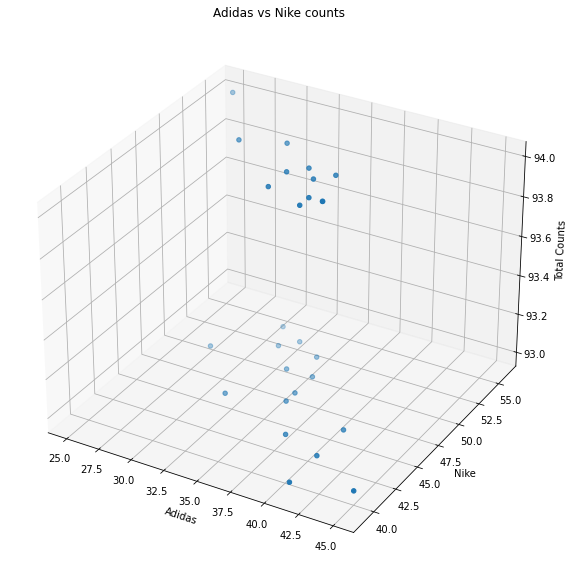

In [70]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

threedee = plt.figure(figsize = (12,10)).gca(projection='3d')
threedee.scatter(tri_mask['Adidas'], tri_mask['Nike'], tri_mask['total_counts'], cmap=cm.rainbow)
plt.title('Adidas vs Nike counts')
threedee.set_xlabel('Adidas')
threedee.set_ylabel('Nike')
threedee.set_zlabel('Total Counts')
plt.show()



## Change Point Detection

Retrieve data from the unstacked dataframe, previously aggregated

In [71]:
unstack_df.head(5)

date  Adidas  New Balance  Nike  Puma  Vans  total_counts
0 2019-11-16      26            3    57     4     2            92
1 2019-11-17      25            3    52     4     4            88
2 2019-11-18      31            3    52     4     2            92
3 2019-11-19      27            4    53     4     3            91
4 2019-11-20      25            4    54     4     3            90

Slice on the 'date,' 'Nike,' and 'total_counts' columns

In [72]:
cusum_nike_raw = unstack_df[['date', 'Nike']]
cusum_nike_raw.head(5)

date  Nike
0 2019-11-16    57
1 2019-11-17    52
2 2019-11-18    52
3 2019-11-19    53
4 2019-11-20    54

Invoke the cummulative sum for the Nike column

In [73]:
cusum_nike_raw['cusum'] = cusum_nike_raw['Nike'].cumsum()

<ipython-input-73-4d56d7efa96a>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Display the Nike data

In [74]:
cusum_nike_raw

date  Nike  cusum
0   2019-11-16    57     57
1   2019-11-17    52    109
2   2019-11-18    52    161
3   2019-11-19    53    214
4   2019-11-20    54    268
..         ...   ...    ...
466 2022-01-14    35  22618
467 2022-01-16    41  22659
468 2022-01-18    38  22697
469 2022-01-21    45  22742
470 2022-01-22    40  22782

[471 rows x 3 columns]

Calculate running 3 day average

In [75]:
for i in range(0,cusum_nike_raw.shape[0]-2):
    cusum_nike_raw.loc[cusum_nike_raw.index[i+2],'Nike SMA_3'] = np.round(((cusum_nike_raw.iloc[i,1]+ cusum_nike_raw.iloc[i+1,1] + cusum_nike_raw.iloc[i+2,1])/3),1)

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Display the top 15 values

In [76]:
cusum_nike_raw.head(15)

date  Nike  cusum  Nike SMA_3
0  2019-11-16    57     57         NaN
1  2019-11-17    52    109         NaN
2  2019-11-18    52    161        53.7
3  2019-11-19    53    214        52.3
4  2019-11-20    54    268        53.0
5  2019-11-21    56    324        54.3
6  2019-11-22    49    373        53.0
7  2019-11-23    51    424        52.0
8  2019-11-24    48    472        49.3
9  2019-11-25    45    517        48.0
10 2019-11-26    50    567        47.7
11 2019-11-27    42    609        45.7
12 2019-11-28    44    653        45.3
13 2019-11-29    39    692        41.7
14 2019-11-30    53    745        45.3

Calculate rolling standard deviation

In [77]:
cusum_nike_raw['sigma_3day'] = cusum_nike_raw['Nike'].rolling(3).std()
cusum_nike_raw['sigma_7day'] = cusum_nike_raw['Nike'].rolling(7).std()
cusum_nike_raw.head(15)

<ipython-input-77-105435fb686b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-77-105435fb686b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date  Nike  cusum  Nike SMA_3  sigma_3day  sigma_7day
0  2019-11-16    57     57         NaN         NaN         NaN
1  2019-11-17    52    109         NaN         NaN         NaN
2  2019-11-18    52    161        53.7    2.886751         NaN
3  2019-11-19    53    214        52.3    0.577350         NaN
4  2019-11-20    54    268        53.0    1.000000         NaN
5  2019-11-21    56    324        54.3    1.527525         NaN
6  2019-11-22    49    373        53.0    3.605551    2.690371
7  2019-11-23    51    424        52.0    3.605551    2.225395
8  2019-11-24    48    472        49.3    1.527525    2.794553
9  2019-11-25    45    517        48.0    3.000000    3.804759
10 2019-11-26    50    567        47.7    2.516611    3.690399
11 2019-11-27    42    609        45.7    4.041452    4.461475
12 2019-11-28    44    653        45.3    4.163332    3.366502
13 2019-11-29    39    692        41.7    2.516611    4.353433
14 2019-11-30    53    745        45.3    7.094599    4.810702

Conver the cummulative column to a list 

In [78]:
nike_count_list = list(cusum_nike_raw['Nike'])
nike_count_list[:5]

[57, 52, 52, 53, 54]

Display the five number summary

In [79]:
print("Minimum value: ", np.min(nike_count_list))
print("Maximum value: ", np.max(nike_count_list))
print("Standard Deviation: ", np.std(nike_count_list))
print("Mean: ", np.mean(nike_count_list))
print("Median: ", np.median(nike_count_list))

Minimum value:  35
Maximum value:  98
Standard Deviation:  5.660178578432967
Mean:  48.36942675159236
Median:  48.0


Boxplot the findings

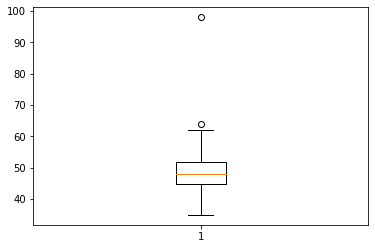

In [80]:
plt.boxplot(nike_count_list)
plt.show()

Create five number summary of the running 3 day standard deviation column

In [81]:
import math
ma_count_list = list(cusum_nike_raw['Nike SMA_3'])
cleaned_ma3_list = [0.0 if math.isnan(x) else x for x in ma_count_list]
cleaned_ma3_list[:5]

[0.0, 0.0, 53.7, 52.3, 53.0]

In [82]:
print("Minimum value: ", np.min(cleaned_ma3_list))
print("Maximum value: ", np.max(cleaned_ma3_list))
print("Standard Deviation: ", np.std(cleaned_ma3_list))
print("Mean: ", np.mean(cleaned_ma3_list))
print("Median: ", np.median(cleaned_ma3_list))

Minimum value:  0.0
Maximum value:  63.7
Standard Deviation:  5.4744687839482795
Mean:  48.162845010615705
Median:  48.3


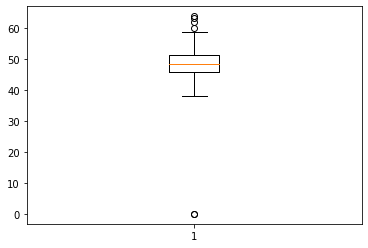

In [83]:
plt.boxplot(cleaned_ma3_list)
plt.show()

Create five number summary of the running 7 day standard deviation column

In [84]:
ma_count_list = list(cusum_nike_raw['sigma_7day'])
cleaned_ma7_list = [0.0 if math.isnan(x) else x for x in ma_count_list]
cleaned_ma7_list[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

In [85]:
print("Minimum value: ", np.min(cleaned_ma7_list))
print("Maximum value: ", np.max(cleaned_ma7_list))
print("Standard Deviation: ", np.std(cleaned_ma7_list))
print("Mean: ", np.mean(cleaned_ma7_list))
print("Median: ", np.median(cleaned_ma7_list))

Minimum value:  0.0
Maximum value:  19.485036994233976
Standard Deviation:  2.2909651306175465
Mean:  3.750804537656834
Median:  3.4364987719368894


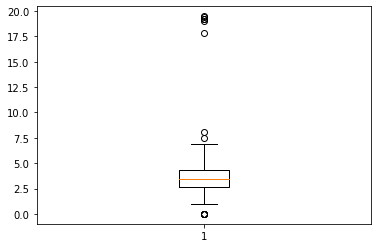

In [86]:
plt.boxplot(cleaned_ma7_list)
plt.show()

## AR Model Forecasting

Conduct a timeseries forecasting analysis using the ARIMA model, using the Nike dataframe and counts as a base testing

In [87]:
from statsmodels.tsa.arima_model import ARIMA
from random import random

Slice a new dataframe with the Nike values

In [88]:
nike_forecast = cusum_nike_raw[['date','Nike']]
nike_forecast.head(5)

date  Nike
0 2019-11-16    57
1 2019-11-17    52
2 2019-11-18    52
3 2019-11-19    53
4 2019-11-20    54

Verify the datatypes of the new dataframe

In [89]:
nike_forecast.dtypes

date    datetime64[ns]
Nike             int64
dtype: object

In [90]:
from random import randrange
series = [i+randrange(10) for i in range(1,100)]
series[:10]

[5, 6, 9, 10, 8, 6, 9, 14, 9, 18]

Slice out cummulative data summary

In [91]:
nike_forecast = cusum_nike_raw[['date','Nike']]
nike_forecast

date  Nike
0   2019-11-16    57
1   2019-11-17    52
2   2019-11-18    52
3   2019-11-19    53
4   2019-11-20    54
..         ...   ...
466 2022-01-14    35
467 2022-01-16    41
468 2022-01-18    38
469 2022-01-21    45
470 2022-01-22    40

[471 rows x 2 columns]

Set the 'date' column as the index for the dataframe

In [92]:
nike_forecast.set_index('date', inplace=True)

Plot the sliced dataframe

<AxesSubplot:xlabel='date'>

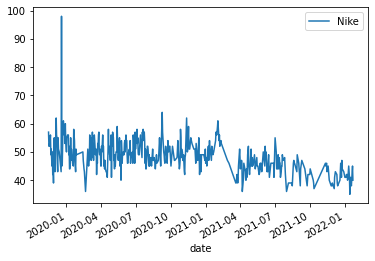

In [93]:
nike_forecast.plot()

Plot the auto correlation

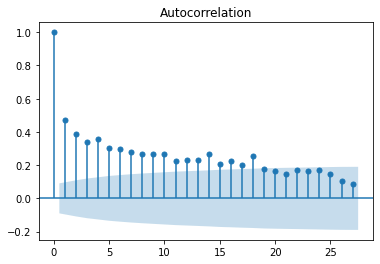

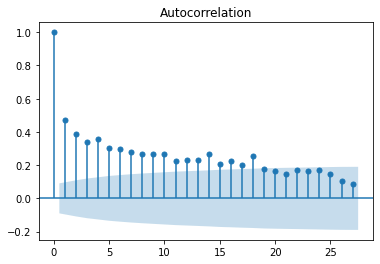

In [94]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(nike_forecast)

Calculate the differences between individual dates

In [95]:
nike_diff = nike_forecast.diff(periods = 1)
nike_diff.reset_index()

date  Nike
0   2019-11-16   NaN
1   2019-11-17  -5.0
2   2019-11-18   0.0
3   2019-11-19   1.0
4   2019-11-20   1.0
..         ...   ...
466 2022-01-14  -6.0
467 2022-01-16   6.0
468 2022-01-18  -3.0
469 2022-01-21   7.0
470 2022-01-22  -5.0

[471 rows x 2 columns]

In [96]:
nike_diff.dtypes

Nike    float64
dtype: object

<AxesSubplot:xlabel='date'>

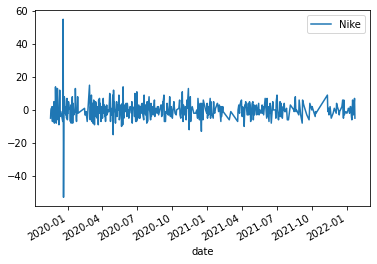

In [97]:
nike_diff.plot()

Plot the autocorrelation for the nike difference dataframe

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning:




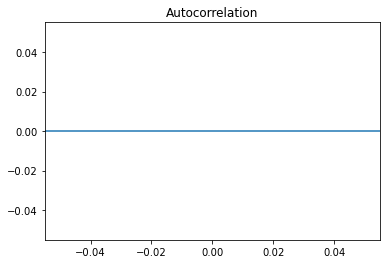

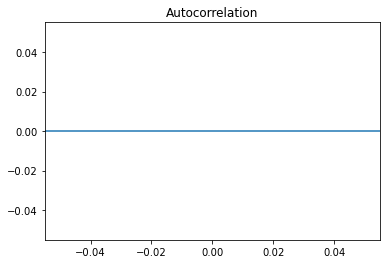

In [98]:
plot_acf(nike_diff)

Convert Nike values to a numpy array for calcualtion

In [99]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

X = nike_forecast[['Nike']].to_numpy()
X[:5]

array([[57],
       [52],
       [52],
       [53],
       [54]])

Create the train set

In [100]:
train = X[:80]
train.size

80

Create the test set

In [101]:
test = X[81:]
test.size

390

Create a predictions list to store the prediction values

In [102]:
predictions = []

Build the AR model

In [103]:
model_ar = AR(train)
model_ar_fit = model_ar.fit()

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Predict the values from index 80 to 108

In [104]:
predictions = model_ar_fit.predict(start = 80, end= 108)

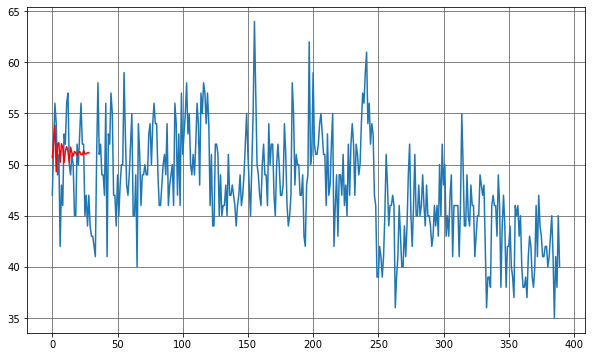

In [105]:
plt.figure(figsize = (10,6))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.plot(test)
plt.plot(predictions, color ='red')

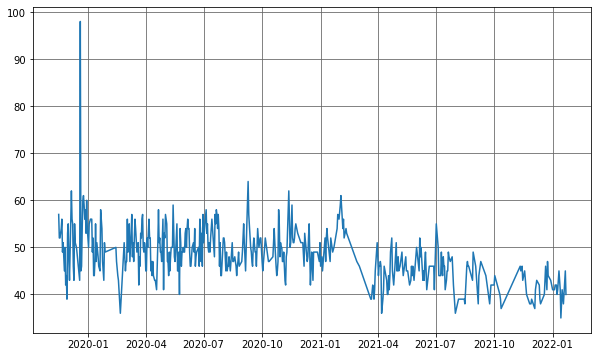

In [106]:
plt.figure(figsize = (10,6))

plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.plot(nike_forecast)

## ARIMA Model Forecast

In [107]:
from statsmodels.tsa.arima_model import ARIMA

Invoke the ARIMA model function in order to build the forecast model

In [108]:
# parameters: p , d, q
# p = periods taken for autoregessive model
# d = order of integrated, number of times differences is executed
# q = periods in moving average model

model_arima = ARIMA(train, order = (10,0,1) )
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




570.3426649494704


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



Fit the model with the test data set

In [109]:
arima_predictions = model_arima_fit.forecast(steps = 25)[0] # predict 25 values
arima_predictions

array([50.16520903, 51.94789254, 52.30815335, 50.55683593, 51.47768753,
       51.43055665, 50.93855998, 51.29185094, 51.33709242, 51.26174271,
       51.0698258 , 51.28603636, 51.18515657, 51.21008859, 51.17083793,
       51.22971538, 51.1576334 , 51.20761768, 51.16966454, 51.2100026 ,
       51.15707288, 51.20885609, 51.1587619 , 51.20628312, 51.15615125])

Plot the forecasted data against the test data

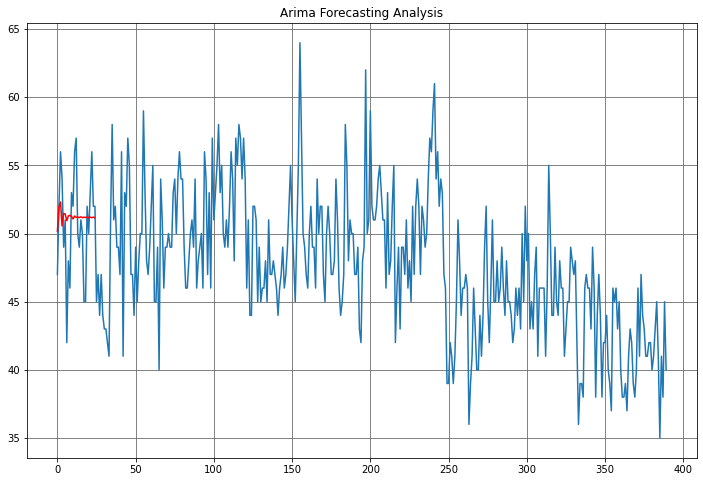

In [110]:
plt.figure(figsize = (12,8))
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.title("Arima Forecasting Analysis")
plt.plot(test)
plt.plot(arima_predictions, color ='red')

In [111]:
print(model_arima_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   80
Model:                    ARMA(10, 1)   Log Likelihood                -272.171
Method:                       css-mle   S.D. of innovations              7.252
Date:                Sat, 22 Jan 2022   AIC                            570.343
Time:                        15:02:37   BIC                            601.309
Sample:                             0   HQIC                           582.758
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1787      1.429     35.812      0.000      48.378      53.980
ar.L1.y       -0.9725      0.111     -8.793      0.000      -1.189      -0.756
ar.L2.y        0.0338      0.157      0.215      0.8

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning:

invalid value encountered in sqrt



### AIC Value Calculation

Calculate the AIC value in order to identify the optimized pdq set for the optimized model.  Lowest value is taken and inputted back in the ARIMA model

In [112]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq[:10]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4)]

In [113]:
for parameter in pdq:
    try:
        model_arima = ARIMA(train, order = parameter )
        model_arima_fit = model_arima.fit()
        print(parameter, model_arima_fit.aic)
    except:
        continue

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




(0, 0, 0) 554.2808313156016
(0, 0, 1) 555.9200161802537
(0, 0, 2) 557.8432431550323
(0, 0, 3) 559.5962816564427
(0, 0, 4) 558.1003669024029
(0, 1, 0) 597.017746712072
(0, 1, 1) 552.067856163539
(0, 1, 2) 553.9081002996122
(0, 1, 3) 555.162261400502
(0, 1, 4) 556.8655359793764
(0, 2, 0) 674.9759525065061
(0, 2, 1) 596.8710908970677
(0, 2, 2) 557.6143114478582
(0, 2, 3) 557.9650890388593
(0, 2, 4) 558.6973141910546
(1, 0, 0) 555.8923350168031
(1, 0, 1) 555.6223271331751
(1, 0, 2) 557.239268497674


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(1, 0, 3) 557.8817680286302
(1, 0, 4) 558.6512860871148


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(1, 1, 0) 578.0133415453254
(1, 1, 1) 553.9461945407893
(1, 1, 2) 555.5099307578587


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(1, 1, 3) 556.1700447140669
(1, 1, 4) 558.3093321175621
(1, 2, 0) 634.7041606815264


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(2, 0, 0) 557.760893323566
(2, 0, 1) 557.3498072479347


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickb

(2, 0, 2) 559.6242223878246
(2, 0, 3) 559.3069844588172
(2, 0, 4) 560.3882725524088
(2, 1, 0) 569.506785752531
(2, 1, 1) 555.2170721947203


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(2, 1, 2) 556.880757625225
(2, 1, 3) 558.7617392355636


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(2, 1, 4) 558.4042488972406
(2, 2, 0) 618.4179801198563


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(3, 0, 0) 559.2345289124887
(3, 0, 1) 558.3348433680886
(3, 0, 2) 559.2157668032728


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/patrickb

(3, 0, 3) 560.1567386966866
(3, 0, 4) 561.3384715816305
(3, 1, 0) 559.8287111935632
(3, 1, 1) 556.254797365033


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(3, 1, 2) 557.9592205339678


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(3, 1, 4) 560.3691405466599
(3, 2, 0) 598.7020447724085
(3, 2, 1) 562.165806262858


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(4, 0, 0) 557.4681121757574
(4, 0, 1) 558.8048517206173
(4, 0, 2) 560.7170444888332


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




(4, 0, 3) 561.1218486979875


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/patrickb

(4, 0, 4) 561.6901718152385
(4, 1, 0) 559.602391365762


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




(4, 1, 1) 556.4697518411423


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

(4, 1, 2) 557.6992603709924
(4, 2, 0) 590.4716156370828


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)




(4, 2, 1) 562.2399335643424
(4, 2, 2) 561.5793233409231


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


/Users/patrickbenitez/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
b

## Forecast

In [114]:
nike_count = cusum_nike_raw[['Nike']]
nike_count

Nike
0      57
1      52
2      52
3      53
4      54
..    ...
466    35
467    41
468    38
469    45
470    40

[471 rows x 1 columns]

Create the training and test sets

In [115]:
train_length = int(len(nike_count.Nike)*.8)
test_length = len(nike_count) - train_length

print("Train length {}".format(train_length))
print("Test length {}".format(test_length))

Train length 376
Test length 95


In [116]:
train = nike_count.Nike[:train_length]
test = nike_count.Nike[train_length:]

In [117]:
test_length = len(test)
test_length

95

Forecast the values

In [118]:
fc, se, conf = model_arima_fit.forecast(test_length, alpha=0.05)  # 95% conf
fc

array([50.98294701, 52.17127254, 52.90772044, 51.86420053, 52.19563546,
       52.53753041, 52.80950248, 52.82678854, 52.99314405, 53.19071243,
       53.38456881, 53.54444997, 53.72117876, 53.90742331, 54.09664537,
       54.28363665, 54.47457794, 54.66955669, 54.86762822, 55.06791396,
       55.27112543, 55.47740369, 55.68663574, 55.89868005, 56.11361171,
       56.33146423, 56.55222702, 56.77587846, 57.00242534, 57.23187362,
       57.46422279, 57.69946973, 57.93761486, 58.17865909, 58.42260251,
       58.66944468, 58.91918561, 59.1718254 , 59.4273641 , 59.68580165,
       59.94713804, 60.21137329, 60.47850741, 60.74854038, 61.0214722 ,
       61.29730288, 61.57603242, 61.85766081, 62.14218807, 62.42961418,
       62.71993914, 63.01316296, 63.30928564, 63.60830718, 63.91022757,
       64.21504683, 64.52276493, 64.8333819 , 65.14689772, 65.4633124 ,
       65.78262593, 66.10483832, 66.42994957, 66.75795968, 67.08886864,
       67.42267646, 67.75938314, 68.09898867, 68.44149306, 68.78

Make a pandas series

In [119]:
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

Plot the final findings 

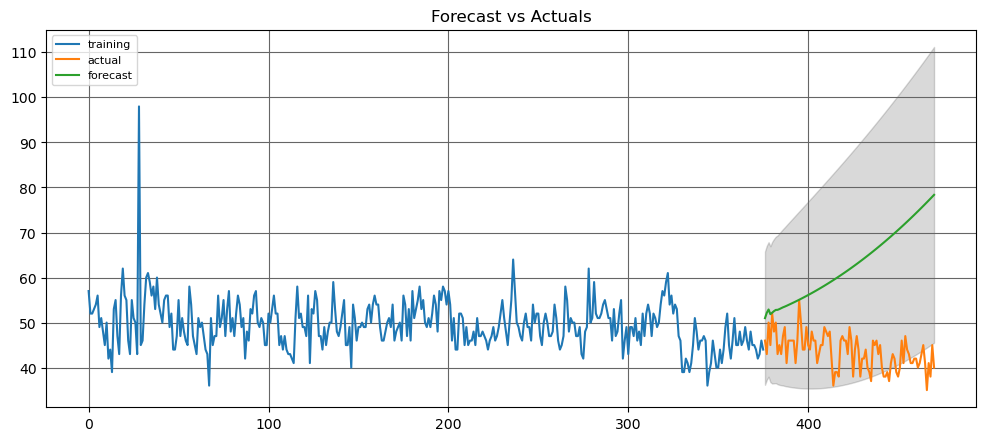

In [120]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Program Completed

In [121]:
program_end = t.time() - program_start
print("Total time for program execution: ", round(program_end, 2), " seconds")

Total time for program execution:  31.32  seconds
